# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---
---
### Why We're Here 

n this notebook, we'll make the first steps towards developing an algorithm that could be used as part of a mobile or web app. At the end of this project, our code will accept any user-supplied image as input. If a dog is detected in the image, it will provide an estimate of the dog's breed. If a human is detected, it will provide an estimate of the dog breed that is most resembling. The image below displays potential sample output of our finished project 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, we'll need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed. There are many points of possible failure, and no perfect algorithm exists. Our imperfect solution will nonetheless create a fun user experience!



### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]
dog_breeds = len(dog_names)

# print number of images in each dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 133 total dog categories.
There are 13233 total human images.
There are 8351 total dog images.


In [2]:
import torchvision.models as models
#model_conv = models.resnet18(pretrained=True)
#for param in model_conv.parameters():
#    param.requires_grad = False
#print(model_conv)
#print(model_conv.fc.in_features)

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


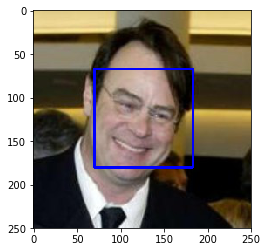

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

`98.00% percentage of the first 100 images in human_files have a detected human face.
17.00% percentage of the first 100 images in dog_files have a detected human face.`

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

# Vectorize the face dectector function
vfunc = np.vectorize(face_detector)


# Detect faces in both sets
human_faces = vfunc(human_files_short)
dog_faces = vfunc(dog_files_short)

human_face_detection_percentage=sum(human_faces)/len(human_faces)*100
dog_face_detection_percentage=sum(dog_faces)/len(dog_faces)*100

# Calculate and print percentage of faces in each set
print('{:.2f}% percentage of the first 100 images in human_files have a detected human face.'.format(human_face_detection_percentage))
print('{:.2f}% percentage of the first 100 images in dog_files have a detected human face.'.format(dog_face_detection_percentage))

98.00% percentage of the first 100 images in human_files have a detected human face.
17.00% percentage of the first 100 images in dog_files have a detected human face.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

#use_cuda=False

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [8]:
#flt=VGG16.classifier.in_features

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [9]:
from PIL import Image
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])


In [11]:
from PIL import Image
import torchvision.transforms as transforms

normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # loads RGB image as PIL.Image.Image type
    img = Image.open(img_path)
    
    img_tensor = preprocess(img).cuda()
    img_tensor.unsqueeze_(0)
    
    fc_out = VGG16(img_tensor)
    value, index = torch.max(fc_out, 1)
    
    
    
    return np.asscalar(index.cpu().data[0].numpy()) # predicted class index

print(VGG16_predict(dog_files[0]))

243


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), we'll notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    return ((prediction <= 268) & (prediction >= 151))

print(dog_detector(human_files[0]))
print(dog_detector(dog_files[0]))


False
True


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

`0.00% of the images in human_files_short have a detected dog.
100.00% of the images in dog_files_short have a detected dog.`



In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

# Vectorize the face dectector function
dog_vfunc = np.vectorize(dog_detector)

# Detect dogs in both sets
human_dogs = dog_vfunc(human_files_short)
dog_dogs = dog_vfunc(dog_files_short)

human_face_detection_percentage=sum(human_dogs)/len(human_dogs)*100
dog_face_detection_percentage=sum(dog_dogs)/len(dog_dogs)*100

# Calculate and print percentage of faces in each set
print('{:.2f}% of the images in human_files_short have a detected dog.'.format(human_face_detection_percentage))
print('{:.2f}% of the images in dog_files_short have a detected dog.'.format(dog_face_detection_percentage))

0.00% of the images in human_files_short have a detected dog.
100.00% of the images in dog_files_short have a detected dog.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [14]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [15]:
## TODO: Specify data loaders
import os
import torch
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
transform={
    'test':    transforms.Compose([
               transforms.Resize(256),
               transforms.CenterCrop(224),
               transforms.ToTensor(),
               normalize
                ]),

    'train':   transforms.Compose([
               transforms.RandomRotation(10),
               transforms.Resize(256),
               transforms.CenterCrop(224),
               transforms.RandomHorizontalFlip(),
               transforms.ToTensor(),
               normalize
                ]),

    'valid':   transforms.Compose([
               transforms.RandomRotation(10),
               transforms.Resize(256),
               transforms.CenterCrop(224),
               transforms.RandomHorizontalFlip(),
               transforms.ToTensor(),
               normalize
                ])
        }

data_dir='dogImages/'

data_scratch={x:datasets.ImageFolder(data_dir+x, transform=transform[x])
             for x in ['train','test','valid']}

#train_data=datasets.ImageFolder(data_dir+'/train', transform=transform['train'])
#valid_data=datasets.ImageFolder(data_dir+'/valid', transform=valid_transform['valid'])
#test_data=datasets.ImageFolder(data_dir+'/test', transform=test_transform['test'])

batch_size=32
num_workers=0

#train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
#    shuffle=True,num_workers=num_workers)
#valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
#    shuffle=True,num_workers=num_workers)
#test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
#    shuffle=True,num_workers=num_workers)

loaders_scratch={
    x:torch.utils.data.DataLoader(data_scratch[x], batch_size=batch_size,
    shuffle=True,num_workers=num_workers)
    for x in ['train','test','valid'] 
    }

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


__Answer__

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be atleast 224.

The images have to be loaded in to a range of [0, 1] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]

Also images of different sizes are first resized to 256x256 and then center cropped to 224x224.

Train and validation datasets are augmented by random rotation of 10 degrees and random horizontal flip to increase the dataset size.

(224, 224, 3)


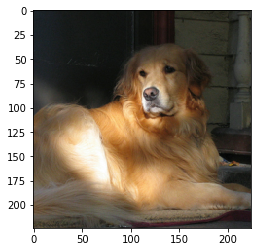

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(loaders_scratch['train'])
images, labels = dataiter.next()
train_image = images[0].numpy().transpose((1, 2, 0)) # convert images to numpy for display
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
train_image = std * train_image + mean
train_image = np.clip(train_image, 0, 1)
#plt.imshow(np.transpose(train_image, (1, 2, 0)))
print(train_image.shape)
plt.imshow(train_image)

torch.Size([3, 224, 224])
(224, 224, 3)


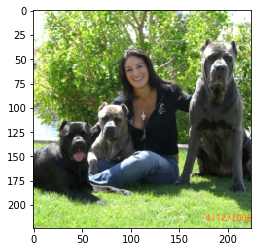

In [17]:
dataiter = iter(loaders_scratch['test'])
images, labels = dataiter.next()
print(images[0].shape)
test_image = images[0].numpy().transpose((1, 2, 0)) # convert images to numpy for display
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
test_image = std * test_image + mean
test_image = np.clip(test_image, 0, 1)
#plt.imshow(np.transpose(train_image, (1, 2, 0)))
print(test_image.shape)
plt.imshow(test_image)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [18]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        #convolutional layer (sees 224x224x3 tensor)
        self.conv1=nn.Conv2d(3,32,3,padding=1)
        #convolutional layer (sees 56x56x32 tensor)
        self.conv2=nn.Conv2d(32,64,3,padding=1)
        #convolutional layer (sees 14x14x64 tensor)
        self.conv3=nn.Conv2d(64,128,3,padding=1)
        #convolutional layer (sees 7x7x128 tensor)
        self.conv4=nn.Conv2d(128,256,3,padding=1)
    
        self.pool4=nn.MaxPool2d(4,4)
        self.pool2=nn.MaxPool2d(2,2)
        self.poolavg=nn.AvgPool2d(7,7)
        
        #linear layer (256->200)
        self.fc1=nn.Linear(256,200)
        #linear layer (200->133)
        self.fc2=nn.Linear(200,dog_breeds)
        self.dropout=nn.Dropout(0.5)
        
        
    
    def forward(self, x):
        ## Define forward behavior
        x=self.pool4(F.relu(self.conv1(x)))
        x=self.pool4(F.relu(self.conv2(x)))
        x=self.pool2(F.relu(self.conv3(x)))
        x=self.poolavg(F.relu(self.conv4(x)))
        x=x.view(-1,256)
        x=self.dropout(x)
        x=self.fc1(x)
        x=self.dropout(x)
        x=self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

print(model_scratch)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (poolavg): AvgPool2d(kernel_size=7, stride=7, padding=0)
  (fc1): Linear(in_features=256, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=133, bias=True)
  (dropout): Dropout(p=0.5)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

In our network architecture, we have used 4 convolutional layers followed by ReLU activation functions and Pooling layers. Pooling layers reduce the width and height in each layer progressively. So we increase the depth in each leyer using more filters. Finally, we have two fully connected layers. We have used dropout in the fully connected layers to avoid overfitting. The output layer has the same number of nodes as the total dog breed classes.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [19]:
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()


### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(),lr=0.001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_scratch, step_size=10, gamma=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                    # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            
        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss
    # return trained model
    return model


# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.861799 	Validation Loss: 4.760359
Validation loss decreased (inf --> 4.760359).  Saving model ...
Epoch: 2 	Training Loss: 4.696844 	Validation Loss: 4.527748
Validation loss decreased (4.760359 --> 4.527748).  Saving model ...
Epoch: 3 	Training Loss: 4.504333 	Validation Loss: 4.347670
Validation loss decreased (4.527748 --> 4.347670).  Saving model ...
Epoch: 4 	Training Loss: 4.398696 	Validation Loss: 4.385499
Epoch: 5 	Training Loss: 4.331113 	Validation Loss: 4.259329
Validation loss decreased (4.347670 --> 4.259329).  Saving model ...
Epoch: 6 	Training Loss: 4.245802 	Validation Loss: 4.109486
Validation loss decreased (4.259329 --> 4.109486).  Saving model ...
Epoch: 7 	Training Loss: 4.160845 	Validation Loss: 4.019881
Validation loss decreased (4.109486 --> 4.019881).  Saving model ...
Epoch: 8 	Training Loss: 4.042365 	Validation Loss: 3.950630
Validation loss decreased (4.019881 --> 3.950630).  Saving model ...
Epoch: 9 	Training Loss: 3.938131 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [21]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.927595


Test Accuracy: 26% (223/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [22]:
## TODO: Specify data loaders
import os
import torch
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
transform={
    'test':    transforms.Compose([
               transforms.Resize(256),
               transforms.CenterCrop(224),
               transforms.ToTensor(),
               normalize
                ]),

    'train':   transforms.Compose([
               transforms.RandomRotation(10),
               transforms.Resize(256),
               transforms.CenterCrop(224),
               transforms.RandomHorizontalFlip(),
               transforms.ToTensor(),
               normalize
                ]),

    'valid':   transforms.Compose([
               transforms.RandomRotation(10),
               transforms.Resize(256),
               transforms.CenterCrop(224),
               transforms.RandomHorizontalFlip(),
               transforms.ToTensor(),
               normalize
                ])
        }

data_dir='dogImages/'

data_transfer={x:datasets.ImageFolder(data_dir+x, transform=transform[x])
             for x in ['train','test','valid']}

#train_data=datasets.ImageFolder(data_dir+'/train', transform=transform['train'])
#valid_data=datasets.ImageFolder(data_dir+'/valid', transform=valid_transform['valid'])
#test_data=datasets.ImageFolder(data_dir+'/test', transform=test_transform['test'])

batch_size=32
num_workers=0

#train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
#    shuffle=True,num_workers=num_workers)
#valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
#    shuffle=True,num_workers=num_workers)
#test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
#    shuffle=True,num_workers=num_workers)

loaders_transfer={
    x:torch.utils.data.DataLoader(data_transfer[x], batch_size=batch_size,
    shuffle=True,num_workers=num_workers)
    for x in ['train','test','valid'] 
    }

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [23]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 


model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad=False

from collections import OrderedDict

model_transfer.classifier[6]=nn.Linear(model_transfer.classifier[6].in_features,dog_breeds)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
#use_cuda=False

# move model to GPU if CUDA is available
if use_cuda:
    model_transfer = model_transfer.cuda()

    
    
print(model_transfer)



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__

We have used pre-trained VGG network to classify different dog's breed. This VGG network is pretrained on imagnet dataset to classify 1000 categories which include different animals and everyday objects including dog's breed. As VGG trained, each of its convolutional layers learns to distinguish the shape of color of different objects. In order to use this pretrained VGG network, If the new dog data set is small and similar to the original imagenet data, we pwerform the following steps: first we slice off the end of the neural network and add a new fully connected layer that matches the number of classes in the new data set, then we randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network and we train the network to update the weights of the new fully connected layer. Becasue our training dataset is smalland similar to imagenet dataset, this pretrained VGG network outperformed the scratch model in this dog's breed classification task.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [25]:
import torch.optim.lr_scheduler as lr_scheduler
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier[6].parameters(),lr=0.001)
# Decay LR by a factor of 0.1 every 4 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_transfer, step_size=4, gamma=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [26]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')



Epoch: 1 	Training Loss: 1.147651 	Validation Loss: 0.484516
Validation loss decreased (inf --> 0.484516).  Saving model ...
Epoch: 2 	Training Loss: 0.459661 	Validation Loss: 0.450724
Validation loss decreased (0.484516 --> 0.450724).  Saving model ...
Epoch: 3 	Training Loss: 0.371842 	Validation Loss: 0.409709
Validation loss decreased (0.450724 --> 0.409709).  Saving model ...
Epoch: 4 	Training Loss: 0.347896 	Validation Loss: 0.456491
Epoch: 5 	Training Loss: 0.299553 	Validation Loss: 0.420427
Epoch: 6 	Training Loss: 0.267879 	Validation Loss: 0.488732
Epoch: 7 	Training Loss: 0.253970 	Validation Loss: 0.461402
Epoch: 8 	Training Loss: 0.238095 	Validation Loss: 0.451442
Epoch: 9 	Training Loss: 0.250103 	Validation Loss: 0.458136
Epoch: 10 	Training Loss: 0.235137 	Validation Loss: 0.514889


In [27]:
model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad=False

#from collections import OrderedDict

model_transfer.classifier[6]=nn.Linear(model_transfer.classifier[6].in_features,dog_breeds)

#model_transfer.=classifier

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
if use_cuda:
    model_transfer = model_transfer.cuda()

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [28]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.493205


Test Accuracy: 83% (701/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [29]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    
    img_tensor = preprocess(img).cuda()
    img_tensor.unsqueeze_(0)
    
    fc_out = model_transfer(img_tensor)
    value, index = torch.max(fc_out, 1)
    
    
    
    return class_names[np.asscalar(index.cpu().data[0].numpy())] 
    

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [40]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    breed= predict_breed_transfer(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # since the dog detector worked better, and we don't have 
    # access to softmax probabilities from dog and face detectors
    # we'll first check for dog detection, and only if there are no dogs
    # detected we'll check for humans
    if dog_detector(img_path):
        print('Hello Dog!')
        plt.figure()
        plt.imshow(img)
        print('You look like a {}.'.format(breed))
        
    elif face_detector(img_path):
        print('Hello human!')
        plt.figure()
        plt.imshow(img)
        print('If you were a dog, you\'d be a {}.'.format(breed))
    else:
        print('Could not detect dogs or humans in image.')
        plt.figure()
        plt.imshow(img)


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Hello human!
If you were a dog, you'd be a Boston terrier.
Hello human!
If you were a dog, you'd be a Komondor.
Hello human!
If you were a dog, you'd be a Komondor.
Hello Dog!
You look like a Mastiff.
Hello Dog!
You look like a Mastiff.
Hello Dog!
You look like a Mastiff.


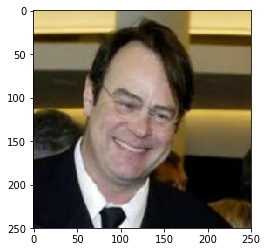

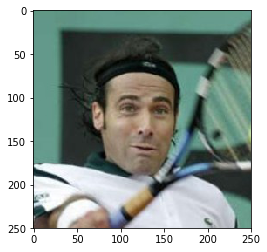

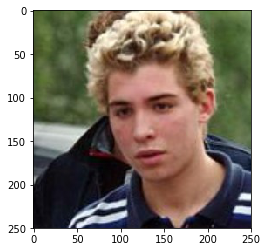

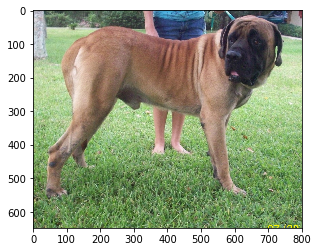

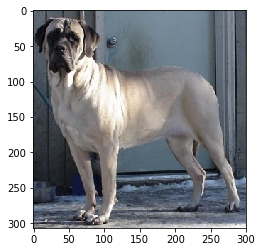

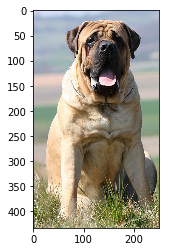

In [41]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

Hello Dog!
You look like a Brittany.


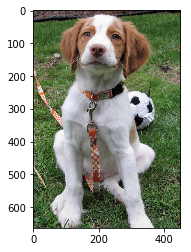

In [42]:
run_app('images/Brittany_02625.jpg')

Hello Dog!
You look like a Labrador retriever.


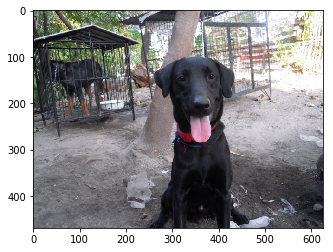

In [43]:
run_app('images/Labrador_retriever_06449.jpg')

Could not detect dogs or humans in image.


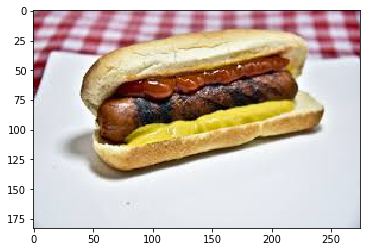

In [44]:
run_app('images/hot_dog2.jpg')

Hello human!
If you were a dog, you'd be a Silky terrier.


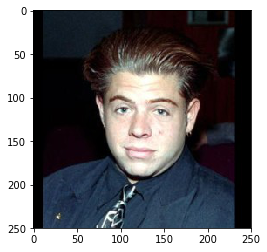

In [45]:
run_app('lfw/Adam_Rich/Adam_Rich_0001.jpg')

Hello human!
If you were a dog, you'd be a Chinese crested.


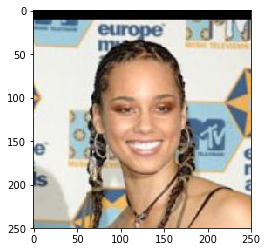

In [46]:
run_app('lfw/Alicia_Keys/Alicia_Keys_0001.jpg')

Could not detect dogs or humans in image.


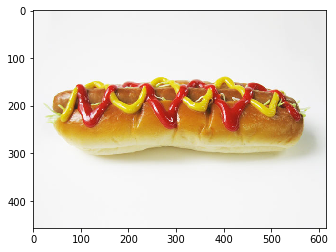

In [47]:
run_app('images/hot_dog1.jpg')